<a href="https://colab.research.google.com/github/ArunK-ML/Project---TripFare-Predicting-Urban-Taxi-Fare-with-Machine-Learning/blob/main/TripFare_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 **TripFare : Predicting Urban Taxi Fare with Machine Learning**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

df = pd.read_csv("/content/taxi_fare.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [8]:
df.shape

(212345, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

# ** Preprocessing**

In [10]:
# Change dtype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [11]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,int64
store_and_fwd_flag,object
dropoff_longitude,float64
dropoff_latitude,float64


In [12]:
df.duplicated().sum() # No duplicate

np.int64(0)

In [13]:
df.isna().sum() # No missing values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


**Feature Engineering**

In [14]:
import numpy as np

# Haversine formula function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply to your DataFrame
df["trip_distance_km"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)

In [15]:

# Classify as 'Weekday' or 'Weekend'

df['pickup_day'] = df['tpep_pickup_datetime'].dt.weekday.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)


In [16]:
# Extract day of the week: Monday=0, Sunday=6
df['pickup_week'] = df['tpep_pickup_datetime'].dt.weekday

In [17]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_day,pickup_week
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,Weekday,1
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,Weekday,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,Weekday,1
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,Weekday,1
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,Weekday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279,Weekday,1
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576,Weekday,1
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119,Weekday,1
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737,Weekday,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype                     
---  ------                      --------------   -----                     
 0   VendorID                    212345 non-null  int64                     
 1   tpep_pickup_datetime        212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime       212345 non-null  datetime64[ns, UTC]       
 3   passenger_count             212345 non-null  int64                     
 4   pickup_longitude            212345 non-null  float64                   
 5   pickup_latitude             212345 non-null  float64                   
 6   RatecodeID                  212345 non-null  int64                     
 7   store_and_fwd_flag          212345 non-null  object                    
 8   dropoff_longitude           212345 non-null  float64                   
 9   dropoff_latitude            212345 no

In [18]:
df["pickup_day"].unique()

array(['Weekday'], dtype=object)

In [19]:
df["pickup_week"].unique()

array([1, 3], dtype=int32)

In [20]:
df["pickup_week"].value_counts()

,count
pickup_week,
1,130562
3,81783


In [21]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_km', 'pickup_day', 'pickup_week'],
      dtype='object')

In [22]:
# Extract AM/PM
df['pickup_am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [23]:
# Ensure pickup_hour is extracted
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Binary flag for night trips
df['is_night'] = df['pickup_hour'].apply(
    lambda x: 1 if (x >= 22 or x <= 5) else 0
)

In [24]:
import pytz

# Step 1: Localize as UTC
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (EDT/EST based on date)
df['tpep_pickup_datetime_(EDT)'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')


In [25]:
df["Pickup_Month"] = df["tpep_pickup_datetime"].dt.month

In [26]:
# pickup_season = 	Spring/Summer/Fall/Winter (based on month)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['pickup_season'] = df['Pickup_Month'].apply(get_season)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype                     
---  ------                      --------------   -----                     
 0   VendorID                    212345 non-null  int64                     
 1   tpep_pickup_datetime        212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime       212345 non-null  datetime64[ns, UTC]       
 3   passenger_count             212345 non-null  int64                     
 4   pickup_longitude            212345 non-null  float64                   
 5   pickup_latitude             212345 non-null  float64                   
 6   RatecodeID                  212345 non-null  int64                     
 7   store_and_fwd_flag          212345 non-null  object                    
 8   dropoff_longitude           212345 non-null  float64                   
 9   dropoff_latitude            212345 no

# ** Exploratory Data Analysis (EDA)**

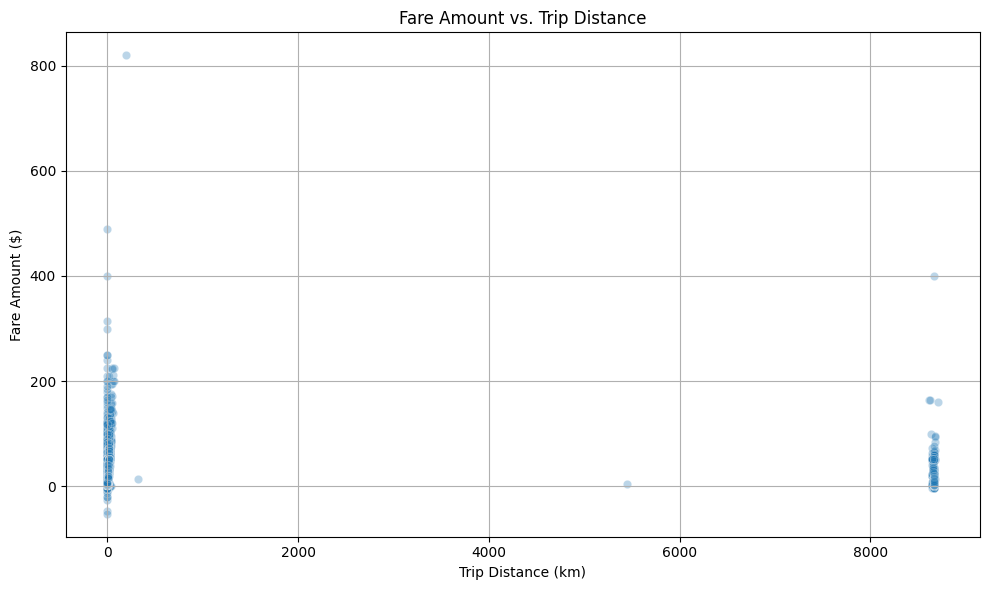

In [27]:
#  Fare vs. Distance: Exploratory Data Analysis

# ----------------------------
# Step 3: Scatter Plot (Fare vs. Distance)
# ----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='trip_distance_km',
    y='fare_amount',
    alpha=0.3
)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

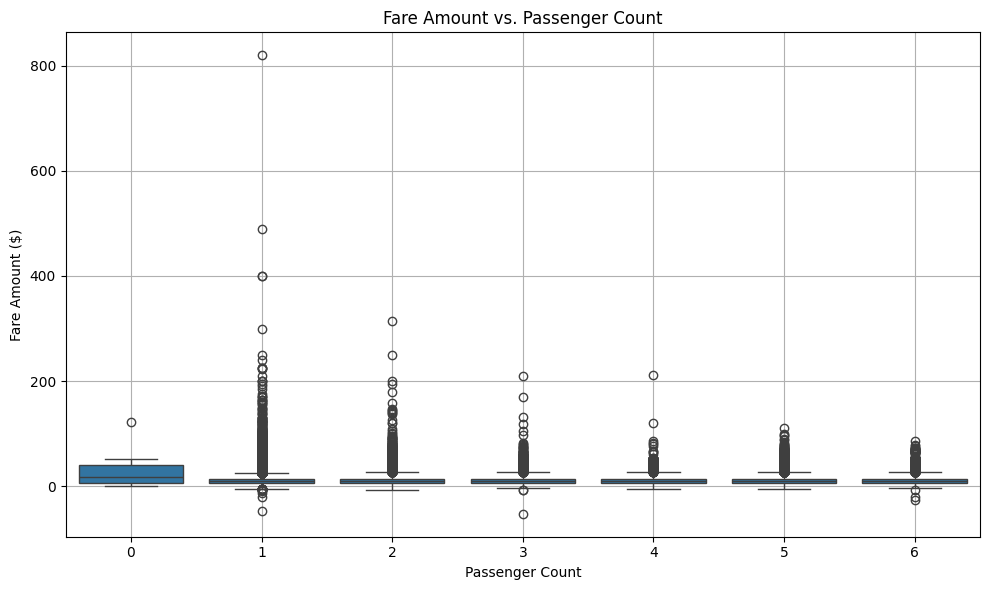

In [28]:
# ----------------------------
# Plot: Fare vs. Passenger Count
# ----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Data Transformation**

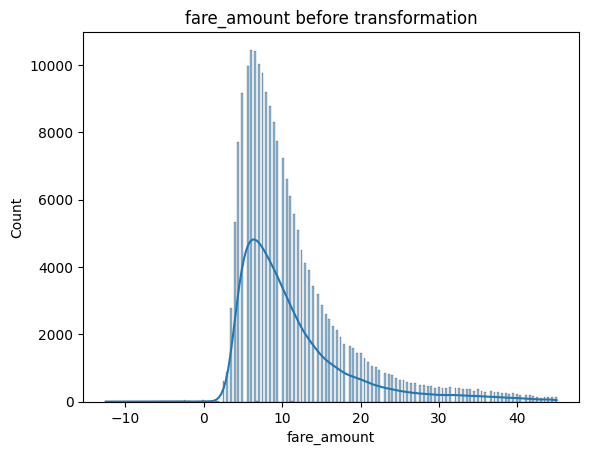

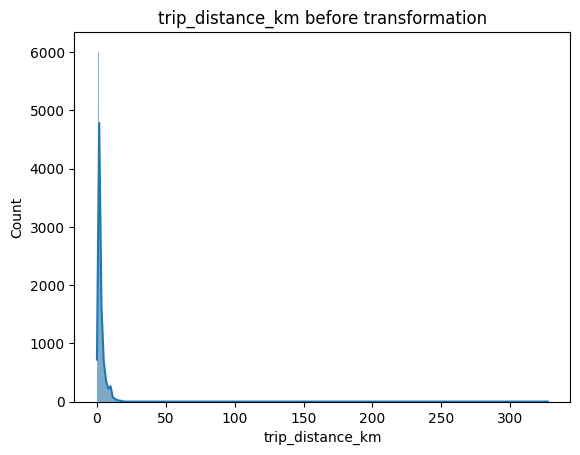

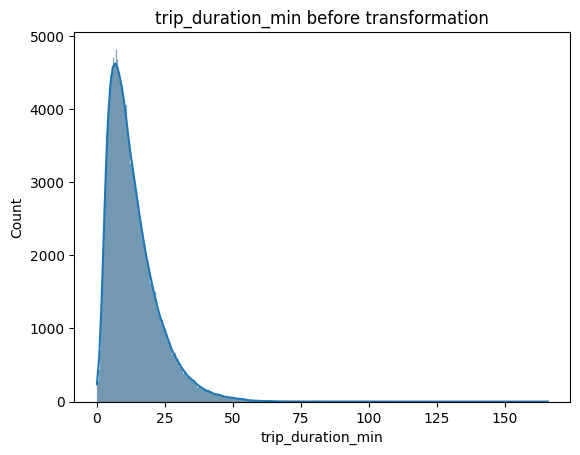

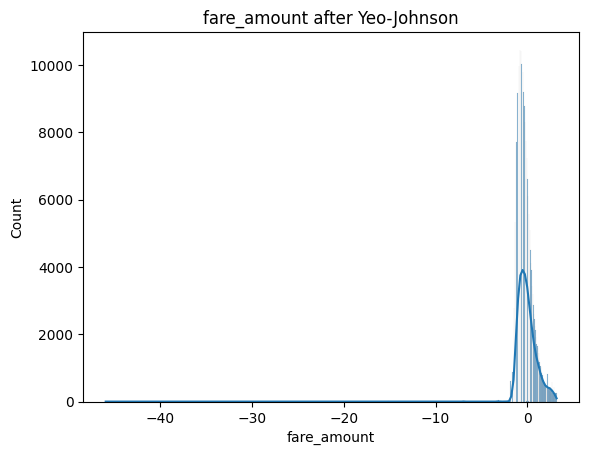

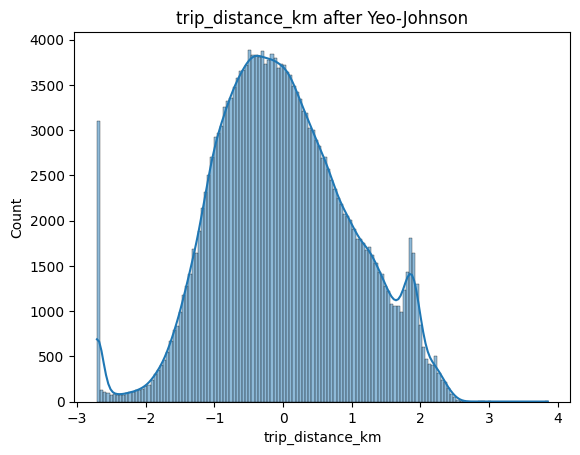

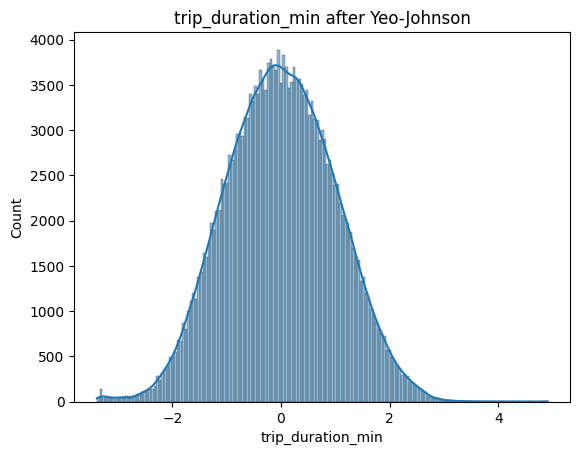

KeyError: 'pickup_day_type'

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Select continuous and categorical columns
continuous_cols = ['fare_amount', 'trip_distance_km', 'trip_duration_min']
categorical_cols = ['pickup_day_type', 'am_pm', 'is_night']

# ---------------------------------------
# 1️⃣ Outlier Handling (Z-score method)
# ---------------------------------------
# Z-score threshold
z_thresh = 3

# Remove outliers
df_z = df.copy()
for col in continuous_cols:
    df_z = df_z[(np.abs(zscore(df_z[col])) < z_thresh)]

# ---------------------------------------
# 2️⃣ Fix Skewness (Log or Yeo-Johnson)
# ---------------------------------------
# Visual before
for col in continuous_cols:
    sns.histplot(df_z[col], kde=True)
    plt.title(f'{col} before transformation')
    plt.show()

# Yeo-Johnson transformation (works with zeros & negatives)
pt = PowerTransformer(method='yeo-johnson')
df_trans = df_z.copy()
df_trans[continuous_cols] = pt.fit_transform(df_trans[continuous_cols])

# Visual after
for col in continuous_cols:
    sns.histplot(df_trans[col], kde=True)
    plt.title(f'{col} after Yeo-Johnson')
    plt.show()

# ---------------------------------------
# 3️⃣ Encode Categorical Variables
# ---------------------------------------
le = LabelEncoder()
df_encoded = df_trans.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# ✅ Final transformed dataset ready for modeling
print("Transformed dataset shape:", df_encoded.shape)
print("Sample:\n", df_encoded.head())

In [31]:
# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60